# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [39]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

In [40]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [41]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [42]:
#TODO: Declare your HP ranges, metrics etc.
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

#bucket = sagemaker_session.default_bucket()
#prefix = "sagemaker/DEMO-pytorch-mnist"

role = sagemaker.get_execution_role() ##must have full access to s3 buckets

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]), ## edit to integerparameter
}

objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "test data loss is ([0-9\\.]+)"}]



In [45]:
#TODO: Create estimators for your HPs

from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large",
    hyperparameters = {'epochs':4 }
  #  hyperparameters = {'valid_dir': 's3://dogimages/dogImages/valid' ,'test_dir': 's3://dogimages/dogImages/test/'}
)


tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [46]:
sagemaker_session.default_bucket()

'sagemaker-us-east-1-741784284850'

In [51]:
# TODO: Fit your HP Tuner
tuner.fit({'training' : 's3://mydogimages' , 
           'validation' : 's3://mydogimages/valid/' , 
           'testing' : 's3://mydogimages/test/',
           'model_dir' : 's3://' + str(sagemaker_session.default_bucket()) 
          }) #/dogImages/train/ TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


...............................................................................................................................................!


In [52]:
print(tuner.best_training_job())
print(tuner.best_estimator())

pytorch-training-221003-1022-002-ba4ca7f6

2022-10-03 10:32:56 Starting - Preparing the instances for training
2022-10-03 10:32:56 Downloading - Downloading input data
2022-10-03 10:32:56 Training - Training image download completed. Training in progress.
2022-10-03 10:32:56 Uploading - Uploading generated training model
2022-10-03 10:32:56 Completed - Resource retained for reuse


In [53]:
best_tj = tuner.best_training_job()
best_est = tuner.best_estimator()
best_est.model_data


2022-10-03 10:32:56 Starting - Preparing the instances for training
2022-10-03 10:32:56 Downloading - Downloading input data
2022-10-03 10:32:56 Training - Training image download completed. Training in progress.
2022-10-03 10:32:56 Uploading - Uploading generated training model
2022-10-03 10:32:56 Completed - Resource retained for reuse


's3://sagemaker-us-east-1-741784284850/pytorch-training-221003-1022-002-ba4ca7f6/output/model.tar.gz'

In [54]:
estimator.model_data

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


's3://sagemaker-us-east-1-741784284850/pytorch-training-2022-10-03-10-22-45-145/output/model.tar.gz'

In [55]:
rule_output_path = tuner.best_estimator().output_path + tuner.best_training_job() + "/rule-output"
rule_output_path


2022-10-03 10:32:56 Starting - Preparing the instances for training
2022-10-03 10:32:56 Downloading - Downloading input data
2022-10-03 10:32:56 Training - Training image download completed. Training in progress.
2022-10-03 10:32:56 Uploading - Uploading generated training model
2022-10-03 10:32:56 Completed - Resource retained for reuse


's3://sagemaker-us-east-1-741784284850/pytorch-training-221003-1022-002-ba4ca7f6/rule-output'

In [56]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.deploy(initial_instance_count=1, instance_type="ml.m5.large") #TODO

#Get the hyperparameters of the best trained model
#best_hyperparameters = best_estimator.hyperparameters()
#best_hyperparameters


2022-10-03 10:32:56 Starting - Preparing the instances for training
2022-10-03 10:32:56 Downloading - Downloading input data
2022-10-03 10:32:56 Training - Training image download completed. Training in progress.
2022-10-03 10:32:56 Uploading - Uploading generated training model
2022-10-03 10:32:56 Completed - Resource retained for reuse
------!

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [112]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule , DebuggerHookConfig , ProfilerRule, rule_configs

rules = [ Rule.sagemaker(rule_configs.vanishing_gradient()),
         Rule.sagemaker(rule_configs.overfit()),
         Rule.sagemaker(rule_configs.overtraining()),
         Rule.sagemaker(rule_configs.poor_weight_initialization()) ]

#hook_config = DebuggerHookConfig(
#    hook_parameters= {'train.save.interval' : '1' , 'eval.save.interval' : '1'}
#)


In [127]:
# Create collection config so that debugger tracks loss value
from sagemaker.debugger import CollectionConfig, DebuggerHookConfig

collection_configs=[CollectionConfig(name="CrossEntropyLoss_output_0", parameters={
    "include_regex": "CrossEntropyLoss_output_0", "train.save_interval": "1","eval.save_interval": "1"})]
hook_config = DebuggerHookConfig(
    collection_configs=collection_configs
)

In [128]:
best_hyperparameters = tuner.best_estimator().hyperparameters()
best_hyperparameters['batch-size'] = '64'
best_hyperparameters


2022-10-03 10:32:56 Starting - Preparing the instances for training
2022-10-03 10:32:56 Downloading - Downloading input data
2022-10-03 10:32:56 Training - Training image download completed. Training in progress.
2022-10-03 10:32:56 Uploading - Uploading generated training model
2022-10-03 10:32:56 Completed - Resource released due to keep alive period expiry


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '64',
 'epochs': '4',
 'lr': '0.0034331670830313127',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-10-03-10-22-45-145"',
 'sagemaker_program': '"train_model.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-741784284850/pytorch-training-2022-10-03-10-22-45-145/source/sourcedir.tar.gz"'}

In [129]:
# TODO: Create and fit an estimator
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point='train_model_debugger.py',
    role = role,
    instance_count= 1,
    instance_type='ml.m5.large',
    hyperparameters=best_hyperparameters,
    framework_version = '1.8',
    py_version = 'py36',
    rules=rules,
    debugger_hook_config= hook_config )

estimator.fit({'training' : 's3://mydogimages' , 
               'validation' : 's3://mydogimages/valid/' , 
               'testing' : 's3://mydogimages/test/'} , wait = True) # TODO: Your estimator here

2022-10-03 12:43:25 Starting - Starting the training job...
2022-10-03 12:43:49 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport-1664801005: InProgress
......
2022-10-03 12:44:57 Downloading - Downloading input data......
2022-10-03 12:45:57 Training - Downloading the training image......
2022-10-03 12:46:58 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-10-03 12:46:45,041 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-10-03 12:46:45,044 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-10-03 12:46:45,061 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-10-03 12:46:45,068 sagemaker_pytorch_container

In [130]:
estimator.latest_training_job.name

'pytorch-training-2022-10-03-12-43-24-822'

In [131]:
# TODO: Plot a debugging output.
print('the training job name is ' , estimator.latest_training_job)
print('the client is ', estimator.sagemaker_session.sagemaker_client)
client = estimator.sagemaker_session.sagemaker_client
print('the description is ' , client.describe_training_job(TrainingJobName = estimator.latest_training_job.name))

the training job name is  <sagemaker.estimator._TrainingJob object at 0x7ffa7a99b650>
the client is  <botocore.client.SageMaker object at 0x7ffa7a884210>
the description is  {'TrainingJobName': 'pytorch-training-2022-10-03-12-43-24-822', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:741784284850:training-job/pytorch-training-2022-10-03-12-43-24-822', 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-741784284850/pytorch-training-2022-10-03-12-43-24-822/output/model.tar.gz'}, 'TrainingJobStatus': 'Completed', 'SecondaryStatus': 'Completed', 'HyperParameters': {'_tuning_objective_metric': '"\\"average test loss\\""', 'batch-size': '"64"', 'epochs': '"4"', 'lr': '"0.0034331670830313127"', 'sagemaker_container_log_level': '20', 'sagemaker_estimator_class_name': '"\\"PyTorch\\""', 'sagemaker_estimator_module': '"\\"sagemaker.pytorch.estimator\\""', 'sagemaker_job_name': '"pytorch-training-2022-10-03-12-43-24-822"', 'sagemaker_program': '"train_model_debugger.py"', 'sagemaker

In [132]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-10-03 12:53:33.642 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:806 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-741784284850/pytorch-training-2022-10-03-12-43-24-822/debug-output


In [133]:
trial.tensor_names() ## to see all the tensors (layers ) in the model

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'layer3.3.relu_input_0',
 'layer3.3.relu_input_1',
 'layer3.3.relu_input_2',
 'layer3.4.relu_input_0',
 'layer3.4.relu_input_1'

In [134]:
tensor = trial.tensor("CrossEntropyLoss_output_0")
tensor.value(tensor.steps(mode=ModeKeys.TRAIN)[0] , mode= ModeKeys.TRAIN)

array(1.1095072, dtype=float32)

In [135]:
len(tensor.steps(mode=ModeKeys.EVAL)) 

14

In [136]:
len(tensor.steps(mode=ModeKeys.TRAIN)) 

3

## plotting the steps loss

In [148]:
def get_data(trial , tensor_name , mode):
    tensor = trial.tensor(tensor_name)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s,mode = mode))
    #vals = [ tensor.value(s , mode=mode) for s in steps] 
    print('vals is ',vals)
    return steps , vals

In [149]:
steps_train, vals_train = get_data(trial, 'CrossEntropyLoss_output_0', mode=ModeKeys.EVAL)
steps_train

vals is  [array(0.6214987, dtype=float32), array(0.6830475, dtype=float32), array(0.654673, dtype=float32), array(0.5465458, dtype=float32), array(0.37442866, dtype=float32), array(0.44279897, dtype=float32), array(0.38592818, dtype=float32), array(0.30980188, dtype=float32), array(0.23665662, dtype=float32), array(0.3250049, dtype=float32), array(0.21059321, dtype=float32), array(0.17512436, dtype=float32), array(0.1785984, dtype=float32), array(0.1531022, dtype=float32)]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [150]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()
    plt.savefig('anything.png')

vals is  [array(1.1095072, dtype=float32), array(1.029561, dtype=float32), array(0.90877324, dtype=float32)]
loaded TRAIN data
vals is  [array(0.6214987, dtype=float32), array(0.6830475, dtype=float32), array(0.654673, dtype=float32), array(0.5465458, dtype=float32), array(0.37442866, dtype=float32), array(0.44279897, dtype=float32), array(0.38592818, dtype=float32), array(0.30980188, dtype=float32), array(0.23665662, dtype=float32), array(0.3250049, dtype=float32), array(0.21059321, dtype=float32), array(0.17512436, dtype=float32), array(0.1785984, dtype=float32), array(0.1531022, dtype=float32)]
loaded EVAL data
completed TRAIN plot
completed EVAL plot


<Figure size 640x480 with 0 Axes>

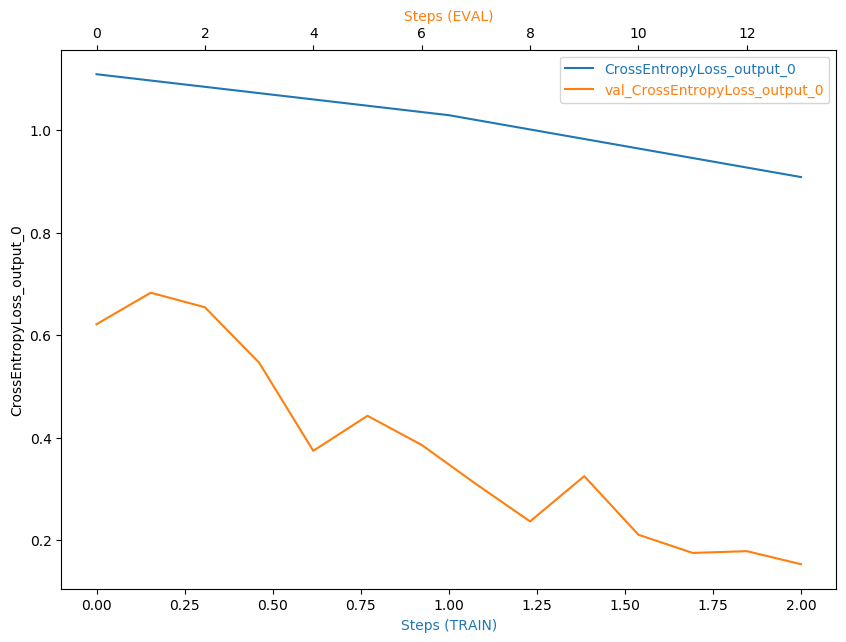

In [151]:
plot_tensor(trial , 'CrossEntropyLoss_output_0')

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

<B/> error in "overfit" : I will try to make some data augmentation or increase the data set I use </B>

In [70]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

2022-10-03 10:49:23     329727 pytorch-training-2022-10-03-10-39-39-053/rule-output/ProfilerReport-1664793579/profiler-output/profiler-report.html
2022-10-03 10:49:23     171100 pytorch-training-2022-10-03-10-39-39-053/rule-output/ProfilerReport-1664793579/profiler-output/profiler-report.ipynb
2022-10-03 10:49:19        191 pytorch-training-2022-10-03-10-39-39-053/rule-output/ProfilerReport-1664793579/profiler-output/profiler-reports/BatchSize.json
2022-10-03 10:49:19        200 pytorch-training-2022-10-03-10-39-39-053/rule-output/ProfilerReport-1664793579/profiler-output/profiler-reports/CPUBottleneck.json
2022-10-03 10:49:19        126 pytorch-training-2022-10-03-10-39-39-053/rule-output/ProfilerReport-1664793579/profiler-output/profiler-reports/Dataloader.json
2022-10-03 10:49:19        127 pytorch-training-2022-10-03-10-39-39-053/rule-output/ProfilerReport-1664793579/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-10-03 10:49:19        199 pytorch-training-2022-10-03-1

In [71]:
estimator.latest_training_job.rule_job_summary()

[{'RuleConfigurationName': 'VanishingGradient',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:741784284850:processing-job/pytorch-training-2022-10-0-vanishinggradient-73e8784b',
  'RuleEvaluationStatus': 'Error',
  'StatusDetails': 'InternalServerError: We encountered an internal error. Please try again.',
  'LastModifiedTime': datetime.datetime(2022, 10, 3, 10, 51, 54, 945000, tzinfo=tzlocal())},
 {'RuleConfigurationName': 'Overfit',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:741784284850:processing-job/pytorch-training-2022-10-0-overfit-4fe05bd2',
  'RuleEvaluationStatus': 'Error',
  'StatusDetails': 'InternalServerError: We encountered an internal error. Please try again.',
  'LastModifiedTime': datetime.datetime(2022, 10, 3, 10, 51, 54, 945000, tzinfo=tzlocal())},
 {'RuleConfigurationName': 'Overtraining',
  'RuleEvaluationJobArn': 'arn:aws:sagemaker:us-east-1:741784284850:processing-job/pytorch-training-2022-10-0-overtraining-bc4f9589',
  'RuleEvaluationStatus

In [72]:
estimator.latest_training_job.rule_job_summary()[0]["RuleConfigurationName"]

'VanishingGradient'

In [73]:
estimator.latest_training_job.rule_job_summary()[1]["RuleConfigurationName"]

'Overfit'

In [74]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [75]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [76]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count= 1 , instance_type='ml.m5.large') # TODO: Add your deployment configuration like instance type and number of instances

------!

In [77]:
!aws s3 ls s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00095.jpg
!aws s3 cp s3://mydogimages/valid/002.Afghan_hound ./ --recursive

2022-10-02 09:52:57     196822 Afghan_hound_00095.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00100.jpg to ./Afghan_hound_00100.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00106.jpg to ./Afghan_hound_00106.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00115.jpg to ./Afghan_hound_00115.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00132.jpg to ./Afghan_hound_00132.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00129.jpg to ./Afghan_hound_00129.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00095.jpg to ./Afghan_hound_00095.jpg
download: s3://mydogimages/valid/002.Afghan_hound/Afghan_hound_00120.jpg to ./Afghan_hound_00120.jpg


In [78]:
from sagemaker.pytorch.model import PyTorchModel
import sagemaker
pytorch_model = PyTorchModel(model_data='s3://sagemaker-us-east-1-741784284850/pytorch-training-221002-2220-001-be1f6c8e/output/model.tar.gz',##best_est.model_data, ##
                             role= sagemaker.get_execution_role() ,
                             entry_point='inference.py',
                              py_version='py36',
                                framework_version="1.8",
                            )
predictor = pytorch_model.deploy(instance_type='ml.m5.large', initial_instance_count=1)

------!

In [79]:
#! pip uninstall torch
#!pip uninstall torchvision

In [80]:
#!pip install torch===1.5.0 torchvision===0.6.0 -f https://download.pytorch.org/whl/torch_stable.html

In [10]:
import torch

In [11]:
from torchvision import transforms

In [153]:
# TODO: Run an prediction on the endpoint
from PIL import Image
import numpy as np
#import torch 
from torchvision import transforms
file = './Afghan_hound_00106.jpg'
# def unpickle(file):
#     import pickle , gzip
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

# data=unpickle(file)
# data=np.reshape(data[b'data'][0], (3, 224, 224))

image = Image.open(file)# TODO: Your code to load and preprocess image to send to endpoint for prediction
image_np = (np.array(image))
print(image_np.shape)

img_size = 224
preprocess = transforms.Compose([
transforms.Resize(img_size), # Resize and crop images
#transforms.CenterCrop(img_size),
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

input_tensor = preprocess(image)
print(input_tensor.size())
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
print(input_batch.size())
image_np = np.array(input_batch)
print(image_np.shape)
#response = best_estimator.predict(image_np)
response = predictor.predict(image_np)

(444, 500, 3)
torch.Size([3, 224, 252])
torch.Size([1, 3, 224, 252])
(1, 3, 224, 252)


In [154]:
response

array([[-0.02382965,  0.01695563, -0.73573816]])

In [155]:
response.argmax()

1

In [24]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()